# Model test
***
Test DenseNet 

In [87]:
%reset -f

In [88]:
# Libraries

import os
from PIL import Image
import itertools

import cv2
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

print('Modules Successfully Loaded')

Modules Successfully Loaded


## Dataframe to split train and test and validation

In [89]:
data_dir= "./Multi-class Weather Dataset"
paths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds :
    condition_path = data_dir +"/" + fold
    all_pic = os.listdir(condition_path)
    for each_pic in all_pic:
        each_pic_path = condition_path +"/" + each_pic
        paths.append(each_pic_path)
        labels.append(fold)
        
pseries = pd.Series(paths, name='Picture Path')
lseries = pd.Series(labels, name='Label')

df = pd.concat([pseries, lseries], axis =1)
df.head()

,Picture Path,Label
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy


In [93]:
df['Label'] = df['Label'].replace({'Cloudy': 'Nuageux', 'Rain': 'Pluvieux', 'Shine': 'Ensoleillé', 'Sunrise': 'Lever du soleil'})
df

,Picture Path,Label,width,height
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Nuageux,600,400
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Nuageux,271,186
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Nuageux,259,194
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Nuageux,338,149
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Nuageux,800,377
...,...,...,...,...
1120,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,1600,1049
1121,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,3008,2000
1122,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,300,168
1123,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,1024,576


In [94]:
import os
from PIL import Image

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height 

# Add columns to dataframe
df['width'], df['height'] = zip(*df['Picture Path'].map(get_image_dimensions))

df.head()


,Picture Path,Label,width,height
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Nuageux,600,400
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Nuageux,271,186
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Nuageux,259,194
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Nuageux,338,149
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Nuageux,800,377


# Width and height distribution 

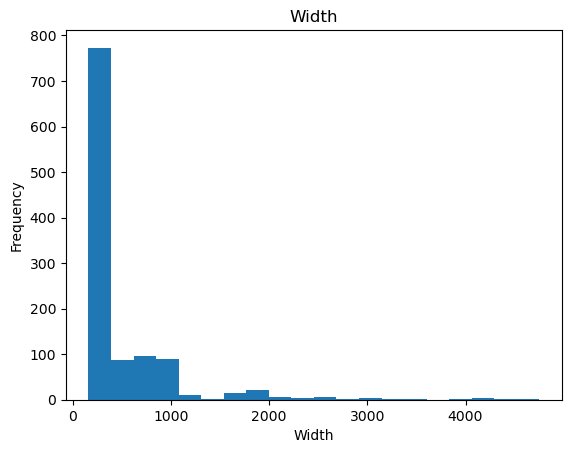

300


In [66]:
plt.hist(df['width'], bins=20)
plt.title('Width')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()
width_counts = df['width'].value_counts()
max_width = width_counts.idxmax()
print(max_width)


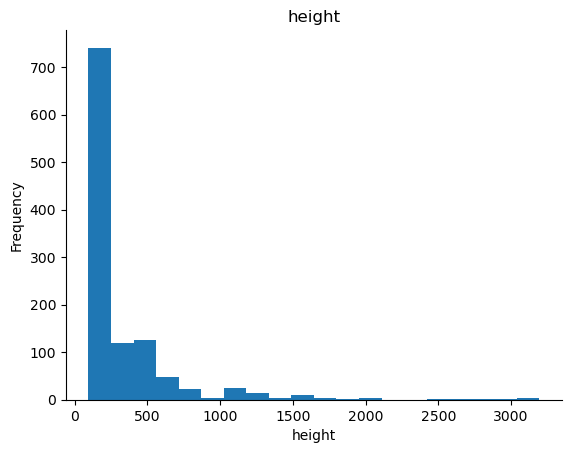

168


In [67]:
plt.hist(df['height'], bins=20)
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
height_counts = df['height'].value_counts()
max_height = height_counts.idxmax()
print(max_height)

# Nombre d'images par classe

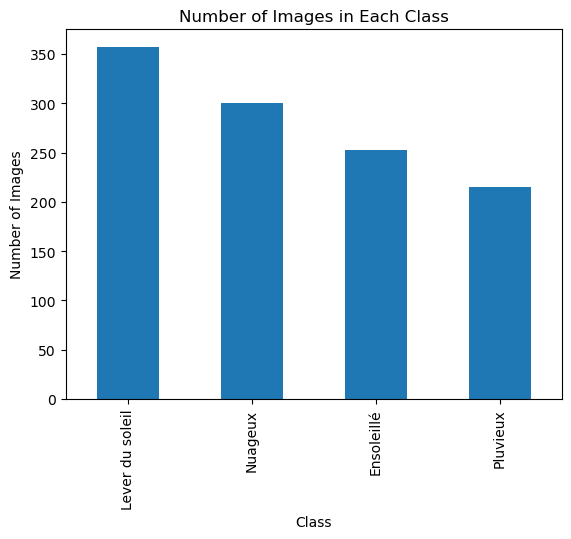

In [95]:
class_counts = df['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.show() 

# Tendance centrale

In [69]:
import matplotlib.pyplot as plt

min_width = df['width'].min()
max_width = df['width'].max()
median_width = df['width'].median()
q1_width = df['width'].quantile(0.25)
q3_width = df['width'].quantile(0.75)
std_width = df['width'].std()

min_height = df['height'].min()
max_height = df['height'].max()
median_height = df['height'].median()
q1_height = df['height'].quantile(0.25)
q3_height = df['height'].quantile(0.75)
std_height = df['height'].std()

# Print the statistics
print('Width:')
print('Minimum:', min_width)
print('Maximum:', max_width)
print('Median:', median_width)
print('First Quartile:', q1_width)
print('Third Quartile:', q3_width)
print('Standard Deviation:', std_width)

print('Height:')
print('Minimum:', min_height)
print('Maximum:', max_height)
print('Median:', median_height)
print('First Quartile:', q1_height)
print('Third Quartile:', q3_height)
print('Standard Deviation:', std_height)


Width:
Minimum: 158
Maximum: 4752
Median: 284.0
First Quartile: 259.0
Third Quartile: 600.0
Standard Deviation: 539.2877747078892
Height:
Minimum: 94
Maximum: 3195
Median: 183.0
First Quartile: 168.0
Third Quartile: 384.0
Standard Deviation: 355.14168742391115


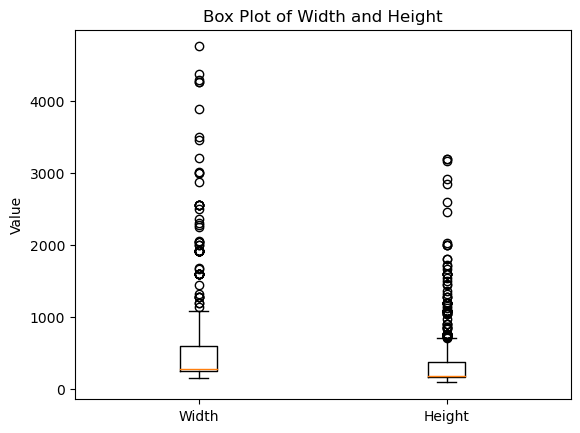

In [70]:
plt.boxplot([df['width'], df['height']], labels=['Width', 'Height'])
plt.title('Box Plot of Width and Height')
plt.ylabel('Value')
plt.show()

Mean Height: 334.75377777777777
Mean Width: 506.3031111111111


<Axes: xlabel='Metric'>

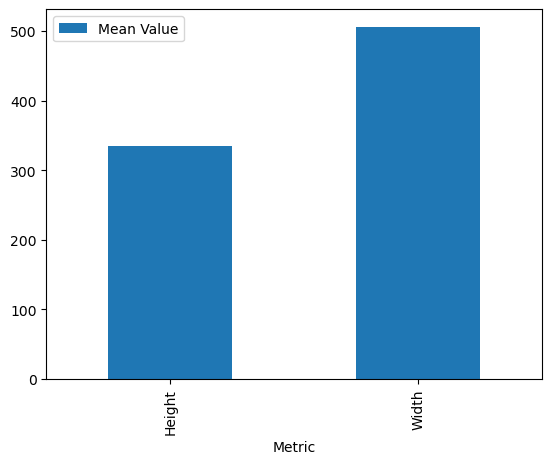

In [71]:
# Valeur moyenne de la largeur et de la hauteur

mean_height = df['height'].mean()
mean_width = df['width'].mean()
print('Mean Height:', mean_height)
print('Mean Width:', mean_width)    
mean_df = pd.DataFrame({'Metric': ['Height', 'Width'], 'Mean Value': [mean_height, mean_width]})
mean_df.plot(x='Metric', y='Mean Value', kind='bar')


In [72]:
df.to_csv('filename.csv', index=False)


## Train test val 

In [99]:
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, stratify=df["Label"], random_state=42)

In [100]:
train_set.head()

,Picture Path,Label,width,height
646,./Multi-class Weather Dataset/Shine/shine217.jpg,Ensoleillé,270,169
892,./Multi-class Weather Dataset/Sunrise/sunrise2...,Lever du soleil,3200,1200
157,./Multi-class Weather Dataset/Cloudy/cloudy240...,Nuageux,300,138
682,./Multi-class Weather Dataset/Shine/shine25.jpg,Ensoleillé,852,480
224,./Multi-class Weather Dataset/Cloudy/cloudy300...,Nuageux,300,149


In [101]:
test_set.head()

,Picture Path,Label,width,height
412,./Multi-class Weather Dataset/Rain/rain20.jpg,Pluvieux,620,413
645,./Multi-class Weather Dataset/Shine/shine216.jpg,Ensoleillé,230,153
90,./Multi-class Weather Dataset/Cloudy/cloudy180...,Nuageux,261,175
717,./Multi-class Weather Dataset/Shine/shine53.jpg,Ensoleillé,284,177
393,./Multi-class Weather Dataset/Rain/rain183.jpg,Pluvieux,630,446


## Image Data generator 

In [102]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

print("Train Set:")
train_gen = tr_gen.flow_from_dataframe(train_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Test Set:")
test_gen = ts_gen.flow_from_dataframe(test_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)


Train Set:
Found 900 validated image filenames belonging to 4 classes.
Test Set:
Found 225 validated image filenames belonging to 4 classes.


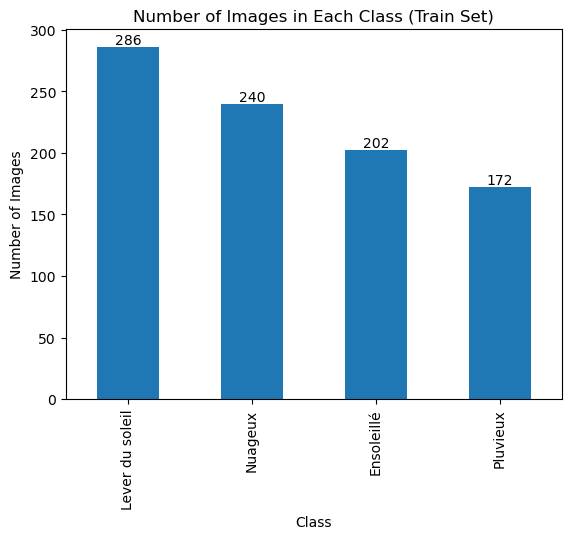

In [120]:
class_counts = train_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train Set)')

# Add the number of images in each class as text on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


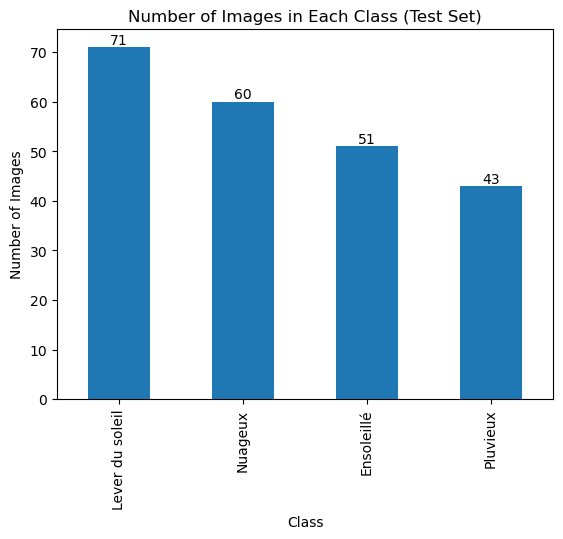

In [121]:
class_counts = test_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Test Set)')

# Add the number of images in each class as text on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Visualize data

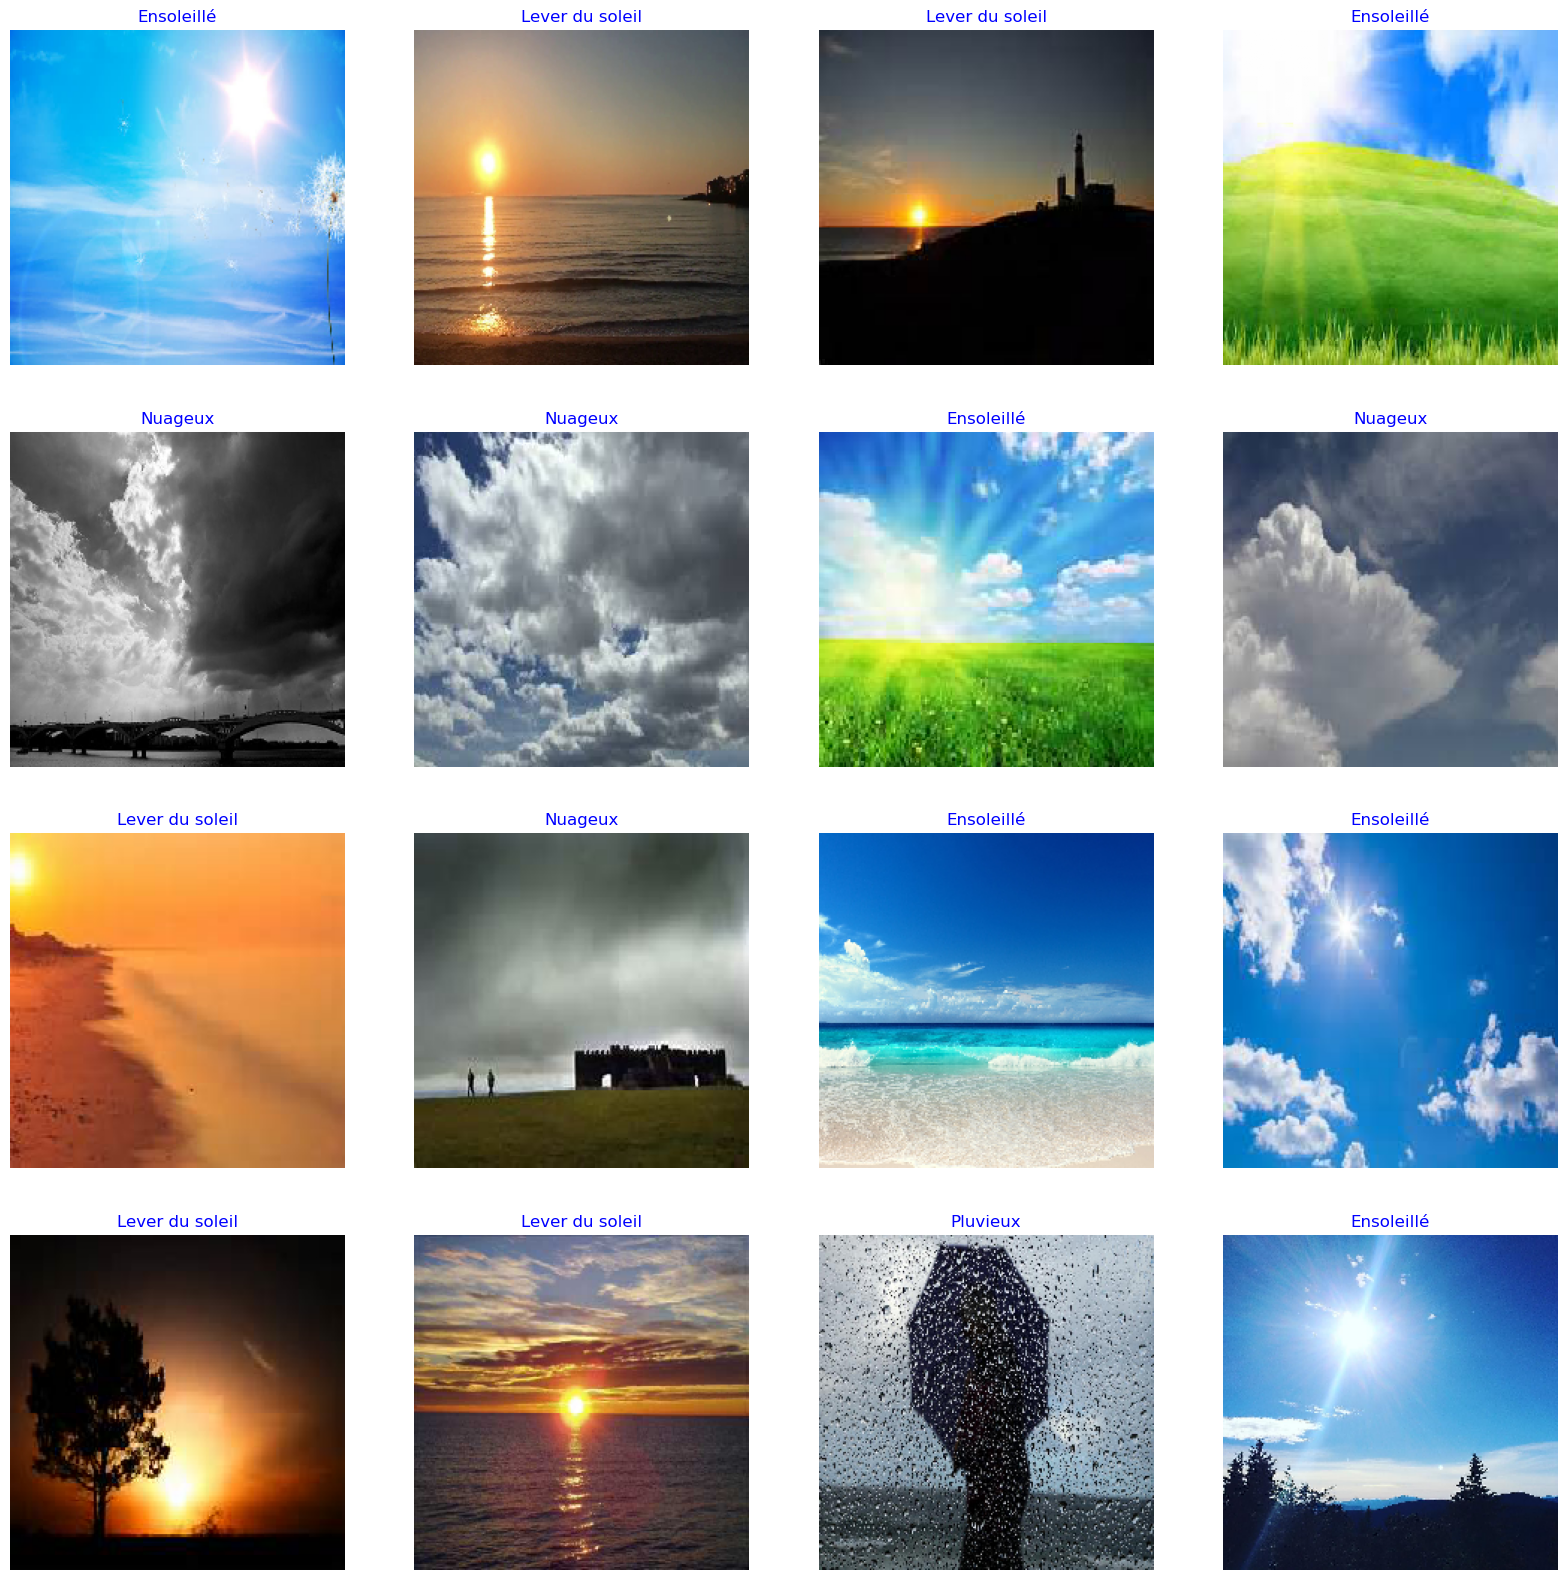

In [105]:
g_dict = train_gen.class_indices  
classes = list(g_dict.keys())    
images, labels = next(train_gen)     
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

## Distribution et Tendance central de luminance 

In [106]:
from skimage import io, color

def get_luminance(path):
    image = io.imread(path)
    gray_image = color.rgb2gray(image)
    luminance_mean = np.mean(gray_image)
    return luminance_mean

luminance = get_luminance(df['Picture Path'][0])
luminance


0.4034989215686274

In [107]:
def calculate_luminance(path):
    try:
        return get_luminance(path)
    except:
        return None

df['Luminance'] = None  

for i in range(len(df["Picture Path"])):
    luminance = calculate_luminance(df['Picture Path'][i])
    print(luminance)
    df.loc[i, 'Luminance'] = luminance 

0.4034989215686274
0.613927039933777
0.5506449658113455
0.5643087600439486
0.5352161635057471
0.4878296051118709
0.4292564733545679
0.44728118310768755
0.43151805703392465
0.476044961366802
0.6464810897642217
0.6426423491006115
0.5504616262737155
0.5943367705412713
0.5183772510542249
0.7048054230292458
0.5417345197705719
0.559906264511757
0.3831948952010648
0.4824122945827207
0.41674114871346296
0.5207037023023198
0.3653299204565262
0.4014283013227513
0.41933577203991834
0.47010627097931124
0.4642234818401148
0.5761379992041025
0.4729827150336165
0.6307202736103439
0.7057029564586592
0.6863719065853079
0.5878316620969926
0.6058146310577723
0.4748306864337337
0.6971382909381388
0.6065238893028323
0.5832225213480392
0.4968165634724217
0.5499980106429739
0.5637568135821115
0.3173783010477548
0.18603854556839228
0.2085943160281698
0.2429375803473501
0.4141732081925492
0.28505368335895426
0.5059137196811576
0.43726764278393043
0.3531181110892674
0.4362962014418473
0.539211786328976
0.535216

In [108]:
df.fillna(0, inplace=True)
df.tail()

,Picture Path,Label,width,height,Luminance
1120,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,1600,1049,0.221634
1121,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,3008,2000,0.177505
1122,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,300,168,0.331269
1123,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,1024,576,0.226069
1124,./Multi-class Weather Dataset/Sunrise/sunrise9...,Lever du soleil,283,178,0.320503


In [109]:
df.to_csv('new_dataframe.csv', index=False)


In [110]:
import pandas as pd

# Define a custom function to calculate the descriptive statistics and mode for each group
def compute_statistics(group):
    # Calculate describe() and transpose for easier column selection and renaming
    summary_df = group.describe().transpose()
    
    # Calculate mode for each column. Since mode can return multiple values, take the first one
    mode_df = group.mode().iloc[0]
    
    # Add the mode to the summary DataFrame
    summary_df['mode'] = mode_df
    
    # Select and rename the columns
    summary_df = summary_df[['count', 'min', 'max', 'mean', '50%', 'mode']]
    summary_df.columns = ['Nombre d’observations', 'Valeur minimale', 'Valeur maximale', 'Moyenne arithmétique', 'Médiane', 'Mode']
    
    return summary_df

# Group the DataFrame by 'Label' and apply the compute_statistics function to each group
results_df = df.groupby('Label').apply(compute_statistics).round(2)

results_df

Nombre d’observations  Valeur minimale  \
Label                                                               
Ensoleillé      width                      253.0           158.00   
                height                     253.0           111.00   
                Luminance                  253.0             0.00   
Lever du soleil width                      357.0           190.00   
                height                     357.0            94.00   
                Luminance                  357.0             0.07   
Nuageux         width                      300.0           183.00   
                height                     300.0           134.00   
                Luminance                  300.0             0.00   
Pluvieux        width                      215.0           183.00   
                height                     215.0           158.00   
                Luminance                  215.0             0.12   

                           Valeur maximale  Moyenne arithmétique  Médiane  \
Label                                                                       
Ensoleillé      width              2880.00                423.98   281.00   
                height             1800.00                284.11   177.00   
                Luminance             0.82                  0.57     0.57   
Lever du soleil width              4752.00                564.16   283.00   
                height             3195.00                372.72   181.00   
                Luminance             0.66                  0.37     0.37   
Nuageux         width              2000.00                416.08   274.50   
                height             2000.00                277.50   178.00   
                Luminance             0.75                  0.46     0.46   
Pluvieux        width              4288.00                633.00   553.00   
                height             2848.00                411.19   352.00   
                Luminance             0.77                  0.47     0.48   

                               Mode  
Label                                
Ensoleillé      width         300.0  
                height        168.0  
                Luminance  0.421749  
Lever du soleil width         300.0  
                height        168.0  
                Luminance  0.226069  
Nuageux         width         259.0  
                height        194.0  
                Luminance       0.0  
Pluvieux        width         275.0  
                height        183.0  
                Luminance  0.455543

In [114]:
# Define a custom function to calculate the descriptive statistics for each group
def compute_statistics(group):
    # Calculate describe() and transpose for easier column selection and renaming
    summary_df = group.describe().transpose()
    
    # Calculate range
    summary_df['range'] = summary_df['max'] - summary_df['min']
    
    # Calculate standard deviation
    summary_df['std'] = group.std()
    
    # Calculate quartiles and interquartile range
    summary_df['25%'] = group.quantile(0.25)
    summary_df['75%'] = group.quantile(0.75)
    summary_df['IQR'] = summary_df['75%'] - summary_df['25%']
    
    # Select and rename the columns
    summary_df = summary_df[['count', 'range', 'std', '25%', '50%', '75%', 'IQR']]
    summary_df.columns = ['Nombre observations', 'Étendue', 'Écart-type', '1er quartile', 'Médiane', '3e quartile', 'Interquartile']
    
    return summary_df

# Group the DataFrame by 'Label' and apply the compute_statistics function to each group
results_df = df.groupby('Label').apply(compute_statistics).round(2)

results_df

Nombre observations  Étendue  Écart-type  \
Label                                                                 
Ensoleillé      width                    253.0  2722.00      395.09   
                height                   253.0  1689.00      257.23   
                Luminance                253.0     0.82        0.11   
Lever du soleil width                    357.0  4562.00      713.07   
                height                   357.0  3101.00      467.40   
                Luminance                357.0     0.60        0.11   
Nuageux         width                    300.0  1817.00      332.35   
                height                   300.0  1866.00      230.36   
                Luminance                300.0     0.75        0.11   
Pluvieux        width                    215.0  4105.00      549.92   
                height                   215.0  2690.00      362.03   
                Luminance                215.0     0.65        0.12   

                           1er quartile  Médiane  3e quartile  Interquartile  
Label                                                                         
Ensoleillé      width            245.00   281.00       318.00          73.00  
                height           168.00   177.00       226.00          58.00  
                Luminance          0.51     0.57         0.65           0.14  
Lever du soleil width            255.00   283.00       480.00         225.00  
                height           168.00   181.00       338.00         170.00  
                Luminance          0.30     0.37         0.44           0.14  
Nuageux         width            246.50   274.50       381.25         134.75  
                height           167.00   178.00       300.00         133.00  
                Luminance          0.40     0.46         0.53           0.14  
Pluvieux        width            286.50   553.00       742.00         455.50  
                height           184.00   352.00       473.00         289.00  
                Luminance          0.40     0.48         0.55           0.15

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
weather_conditions = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
mean_luminance_values = [0.46, 0.47, 0.57, 0.37]
min_luminance_values = [0.0, 0.12, 0.0, 0.07]
max_luminance_values = [0.75, 0.77, 0.82, 0.66]

# Creating a bar chart for average mean luminance
plt.figure(figsize=(10, 6))

# Bar chart
plt.bar(weather_conditions, mean_luminance_values, color=['skyblue', 'grey', 'gold', 'orange'])
plt.title('Average Mean Luminance by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Luminance')
plt.ylim(0, max(max_luminance_values) + 0.05)  # Adding some space above the highest value for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.show()

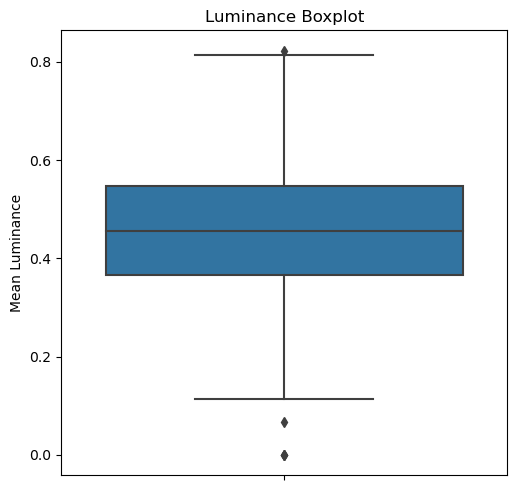

(             width       height  Mean Luminance
 count  1125.000000  1125.000000     1125.000000
 mean    506.303111   334.753778        0.457003
 std     539.287775   355.141687        0.134058
 min     158.000000    94.000000        0.000000
 25%     259.000000   168.000000        0.365330
 50%     284.000000   183.000000        0.455543
 75%     600.000000   384.000000        0.548257
 max    4752.000000  3195.000000        0.823209,
            width      height  Mean Luminance
 mean  506.303111  334.753778        0.457003
 50%   284.000000  183.000000        0.455543,
            width       height  Mean Luminance
 std   539.287775   355.141687        0.134058
 min   158.000000    94.000000        0.000000
 max  4752.000000  3195.000000        0.823209)

In [53]:

import seaborn as sns
# Let's do a descriptive analysis on this DataFrame
descriptive_stats = df.describe()

# Analyze central tendency
central_tendency = descriptive_stats.loc[['mean', '50%']]

# Analyze dispersion
dispersion = descriptive_stats.loc[['std', 'min', 'max']]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Mean Luminance'])
plt.title('Luminance Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

descriptive_stats, central_tendency, dispersion

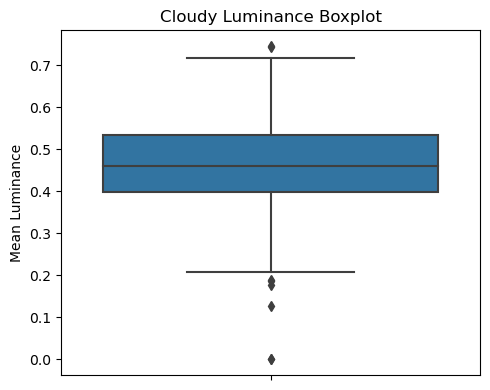

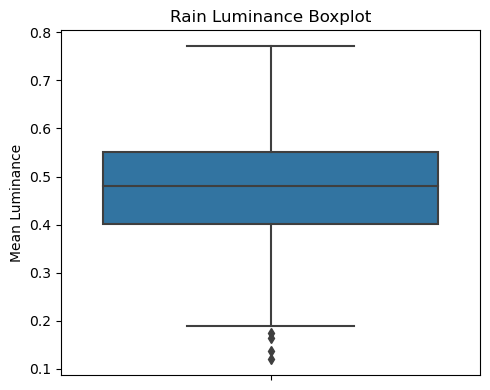

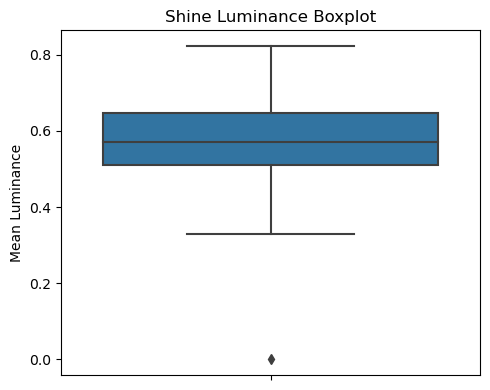

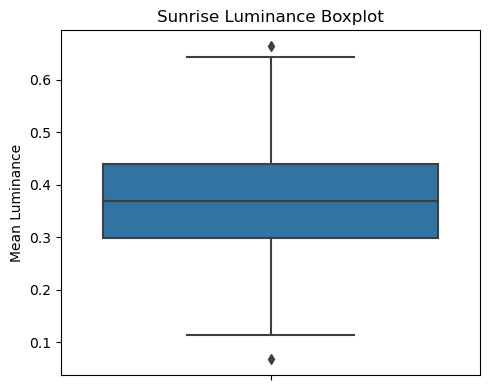

In [54]:
classes = df['Label'].unique()
results = {}
for label in classes:
    # Filter the DataFrame for the current class
    class_df = df[df['Label'] == label]
    
    # Descriptive analysis on the class DataFrame
    descriptive_stats = class_df.describe()
    
    # Analyze central tendency
    central_tendency = descriptive_stats.loc[['mean', '50%']]
    
    # Analyze dispersion
    dispersion = descriptive_stats.loc[['std', 'min', 'max']]
    
    # Generate boxplot for Luminance
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=class_df['Mean Luminance'])
    plt.title(f'{label} Luminance Boxplot')
    plt.tight_layout()
    plt.show()
    
    # Store results in a dictionary
    results[label] = {
        'Descriptive Statistics': descriptive_stats,
        'Central Tendency': central_tendency,
        'Dispersion': dispersion
    }


In [55]:
classes = df['Label'].unique()
results = {}

for label in classes:
    # Filter the DataFrame for the current class
    class_df = df[df['Label'] == label]
    
    # Descriptive analysis on the class DataFrame
    descriptive_stats = class_df.describe()
    
    # Analyze central tendency
    central_tendency = descriptive_stats.loc[['mean', '50%']]
    
    # Store results in a dictionary
    results[label] = descriptive_stats["Mean Luminance"]

results_df = pd.DataFrame(results).transpose()
results_df


,count,mean,std,min,25%,50%,75%,max
Cloudy,300.0,0.456227,0.114250,0.000000,0.398365,0.461195,0.534554,0.746376
Rain,215.0,0.469780,0.116897,0.119596,0.400990,0.480467,0.550705,0.771493
Shine,253.0,0.572415,0.110514,0.000000,0.509965,0.570399,0.645994,0.823209
Sunrise,357.0,0.368170,0.106959,0.067578,0.299245,0.369649,0.440077,0.664015


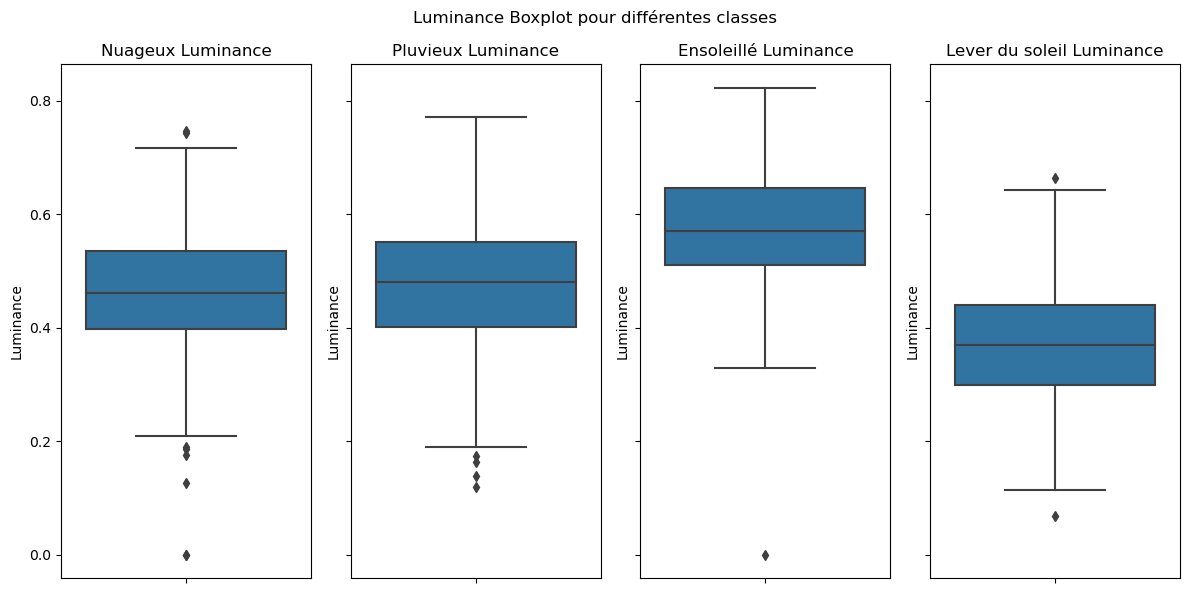

In [119]:
import seaborn as sns
# Obtenir les classes uniques
classes = df['Label'].unique()

# Initialiser un dictionnaire pour stocker les résultats
results = {}

# Créer une figure avec un sous-tracé pour chaque classe
fig, axes = plt.subplots(1, len(classes), figsize=(12, 6), sharey=True)

# Calculer la largeur des boîtes en fonction du nombre de classes
box_width = 0.4

for i, label in enumerate(classes):
    # Filter the DataFrame for the current class
    class_df = df[df['Label'] == label]
    
    # Descriptive analysis on the class DataFrame
    descriptive_stats = class_df.describe()
    
    # Analyze central tendency
    central_tendency = descriptive_stats.loc[['mean', '50%']]
    
    # Analyze dispersion
    dispersion = descriptive_stats.loc[['std', 'min', 'max']]
    
    # Tracer le boxplot pour Luminance avec la position calculée
    sns.boxplot(y=class_df['Luminance'], ax=axes[i])
    
    # Stocker les résultats dans un dictionnaire
    results[label] = {
        'Descriptive Statistics': descriptive_stats,
        'Central Tendency': central_tendency,
        'Dispersion': dispersion
    }
    
    # Définir le titre du sous-tracé
    axes[i].set_title(f'{label} Luminance')
    #axes[i].set_xlabel('Classe')
    axes[i].set_ylabel('Luminance')

# Ajouter un titre global
fig.suptitle('Luminance Boxplot pour différentes classes')

# Afficher le tracé
plt.tight_layout()
plt.show()


## Caracteristiques

In [57]:
from skimage import io, color
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def get_luminance(path):
    image = io.imread(path)
    gray_image = color.rgb2gray(image)
    luminance_mean = np.mean(gray_image)
    return luminance_mean  

    

def get_histogram(path):
    image = io.imread(path)
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    hist_red, bins_red = np.histogram(red_channel, bins=256, range=(0, 256))
    hist_green, bins_green = np.histogram(green_channel, bins=256, range=(0, 256))
    hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=(0, 256))
    
    # Trouver l'intensité maximale dans chaque canal
    max_r = np.argmax(hist_red)
    max_g = np.argmax(hist_green)
    max_b = np.argmax(hist_blue)
    
    # Créer la couleur dominante
    dominant_color =  [max_r, max_g, max_b]

    return dominant_color


def get_spectre(path):
    image = io.imread(path)
    gray_image = color.rgb2gray(image)
    TF = np.fft.fftshift(np.fft.fft2(gray_image))
    plt.imshow(np.log(abs(TF)), cmap='gray')
    plt.xlabel('Fréquence')
    plt.ylabel('Fréquence')

In [58]:
def get_luminance(path):
    image = io.imread(path)
    gray_image = color.rgb2gray(image)
    luminance_mean = np.mean(gray_image)
    return luminance_mean

luminance = get_luminance(df['Picture Path'][0])
luminance

def calculate_luminance(path):
    try:
        return get_luminance(path)
    except:
        return None
def calculate_histogram(path):
    try:
        return get_histogram(path)
    except:
        return None    

df['Mean Luminance'] = None  
df['Dominant Red'] = None

for i in range(len(df["Picture Path"])):
    luminance = calculate_luminance(df['Picture Path'][i])
    couleur_dominante = calculate_histogram(df['Picture Path'][i])
    df.loc[i, 'Mean Luminance'] = luminance 
    df.loc[i, 'Dominant Red'] = str(couleur_dominante)  # Convert ndarray to string

df

,Picture Path,Label,width,height,Mean Luminance,Dominant Red
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy,600,400,0.403499,"[44, 44, 44]"
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy,271,186,0.613927,"[159, 176, 205]"
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy,259,194,0.550645,"[151, 144, 188]"
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy,338,149,0.564309,"[177, 171, 201]"
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy,800,377,0.535216,"[174, 183, 238]"
...,...,...,...,...,...,...
1120,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,1600,1049,0.221634,"[1, 1, 1]"
1121,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,3008,2000,0.177505,"[255, 0, 0]"
1122,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,300,168,0.331269,"[0, 0, 0]"
1123,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,1024,576,0.226069,"[255, 16, 11]"


In [59]:
df.head(10)

,Picture Path,Label,width,height,Mean Luminance,Dominant Red
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy,600,400,0.403499,"[44, 44, 44]"
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy,271,186,0.613927,"[159, 176, 205]"
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy,259,194,0.550645,"[151, 144, 188]"
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy,338,149,0.564309,"[177, 171, 201]"
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy,800,377,0.535216,"[174, 183, 238]"
5,./Multi-class Weather Dataset/Cloudy/cloudy103...,Cloudy,275,183,0.48783,"[47, 95, 148]"
6,./Multi-class Weather Dataset/Cloudy/cloudy104...,Cloudy,275,183,0.429256,"[88, 111, 190]"
7,./Multi-class Weather Dataset/Cloudy/cloudy105...,Cloudy,288,175,0.447281,"[44, 55, 67]"
8,./Multi-class Weather Dataset/Cloudy/cloudy106...,Cloudy,300,168,0.431518,"[90, 112, 168]"
9,./Multi-class Weather Dataset/Cloudy/cloudy107...,Cloudy,275,183,0.476045,"[0, 69, 139]"
